<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-example-II" data-toc-modified-id="Working-example-II-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working example II</a></span></li><li><span><a href="#Artificial-matrix" data-toc-modified-id="Artificial-matrix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Artificial matrix</a></span></li><li><span><a href="#Training-procedure" data-toc-modified-id="Training-procedure-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training procedure</a></span></li><li><span><a href="#Training-two-sequences" data-toc-modified-id="Training-two-sequences-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training two sequences</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Recall" data-toc-modified-id="Recall-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Recall</a></span></li></ul></li></ul></li><li><span><a href="#Disambiguation" data-toc-modified-id="Disambiguation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Disambiguation</a></span><ul class="toc-item"><li><span><a href="#Pre-rule" data-toc-modified-id="Pre-rule-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Pre-rule</a></span><ul class="toc-item"><li><span><a href="#Recall" data-toc-modified-id="Recall-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Recall</a></span></li></ul></li><li><span><a href="#Post-rule" data-toc-modified-id="Post-rule-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Post-rule</a></span><ul class="toc-item"><li><span><a href="#Recall" data-toc-modified-id="Recall-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Recall</a></span></li></ul></li></ul></li></ul></div>

## Working example II

In [1]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network, run_network_recall_limit
from connectivity import designed_matrix_sequences, designed_matrix_sequences_local
from analysis import get_recall_duration_for_pattern, get_recall_duration_sequence, create_sequence_chain
from analysis import time_t1, time_t2, time_t1_local, time_t2_local, time_t2_complicated

## Artificial matrix

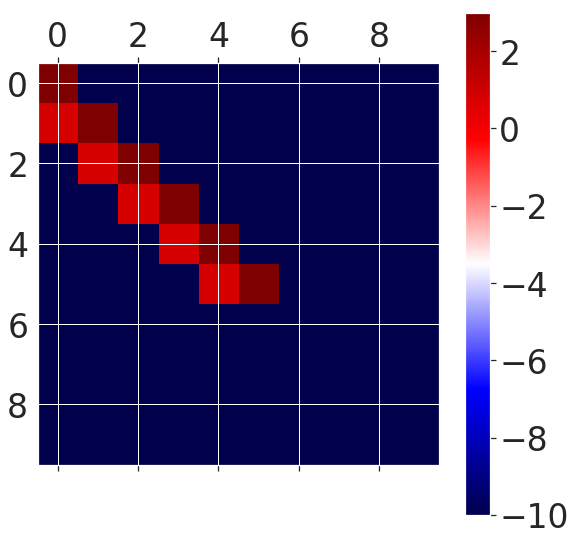

In [6]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5]]
self_excitation = 3.0
transition = 0.8
inhibition = 10.0

threshold = 0.5
tau_z = 0.050

G = 100.0
tau_m = 0.010
T = 2.0
I_cue = 0
T_cue = 0.100
dt = 0.001

w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition,
                              inhibition=inhibition)
dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, T_cue)

plt.matshow(w, cmap='seismic')
plt.colorbar();

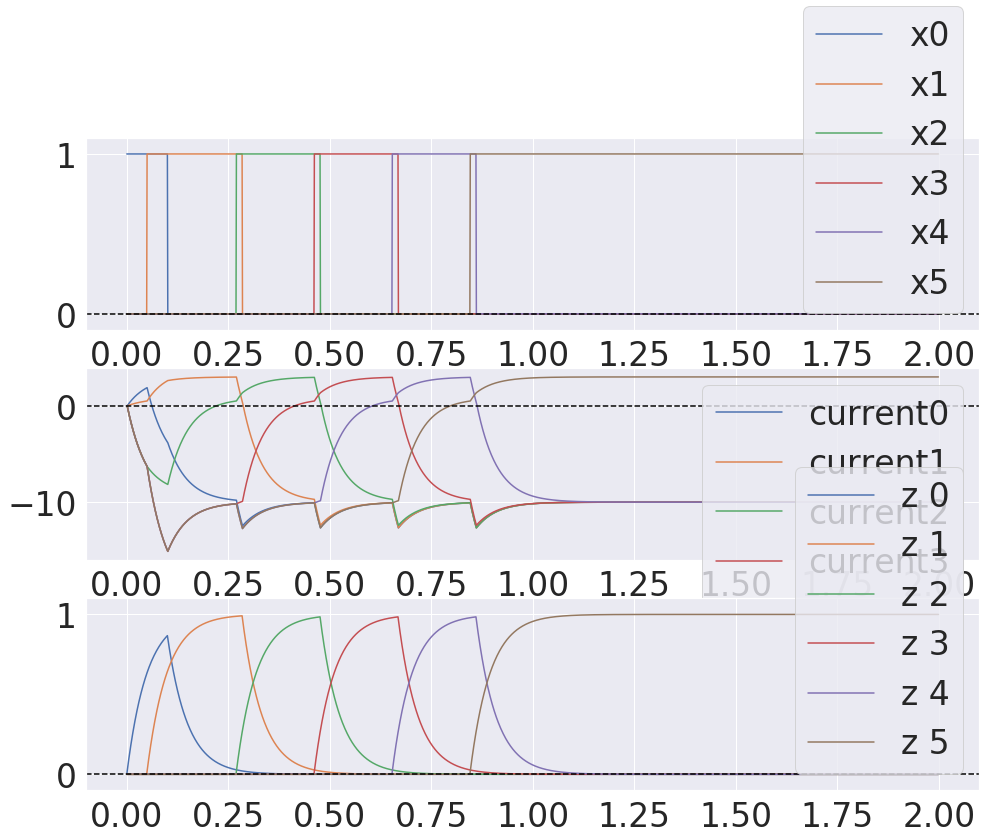

In [8]:
time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2, 3, 4, 5]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

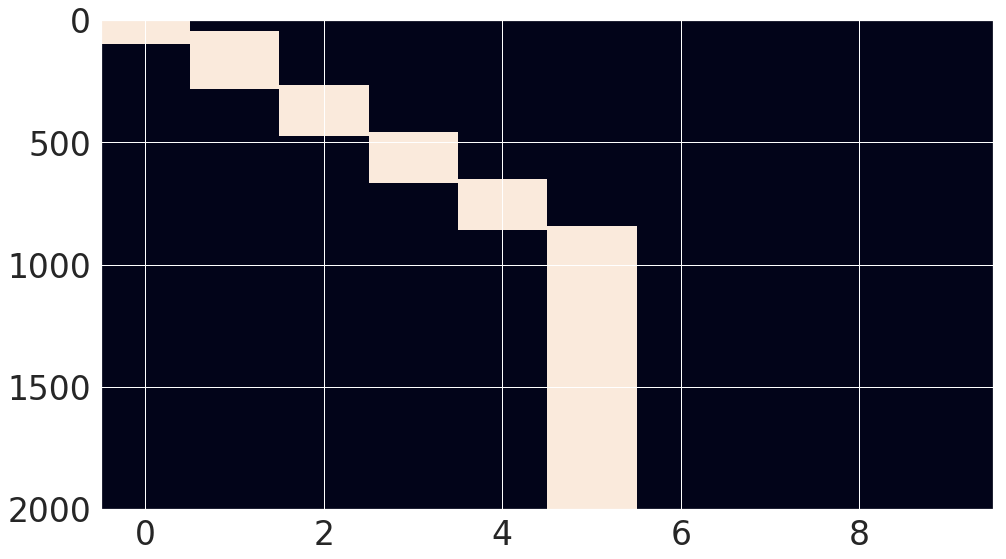

In [12]:
plt.imshow(x_history, aspect='auto')

## Training procedure

exc_t 1.019637420943662 exc_s 8.979055655832987 inh -9.999255132932477


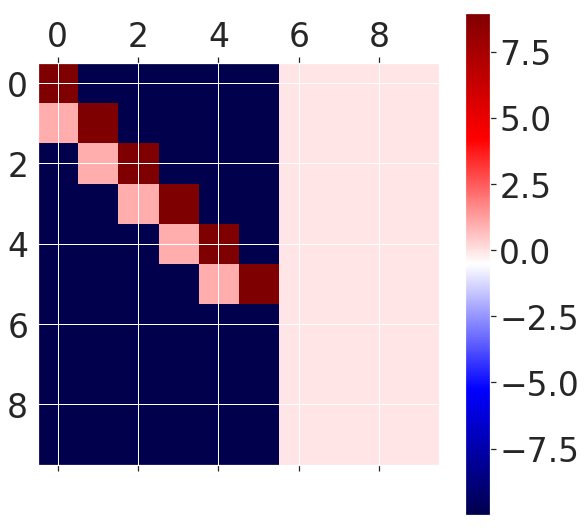

In [20]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5]]
training_time = 0.500
inter_sequence_time = 1.0

max_w = 20.0
min_w = -10.0


threshold = 0.5
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
epochs = 4

G = 100.0
tau_m = 0.010
T = 2.0

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=epochs, max_w=max_w, min_w=min_w)

w = dic['w']

   



exc_t = w[2, 1]
exc_s = w[1, 1]
inh = w[1, 2]
print('exc_t', exc_t, 'exc_s', exc_s, 'inh', inh)
plt.matshow(w, cmap='seismic')
plt.colorbar();


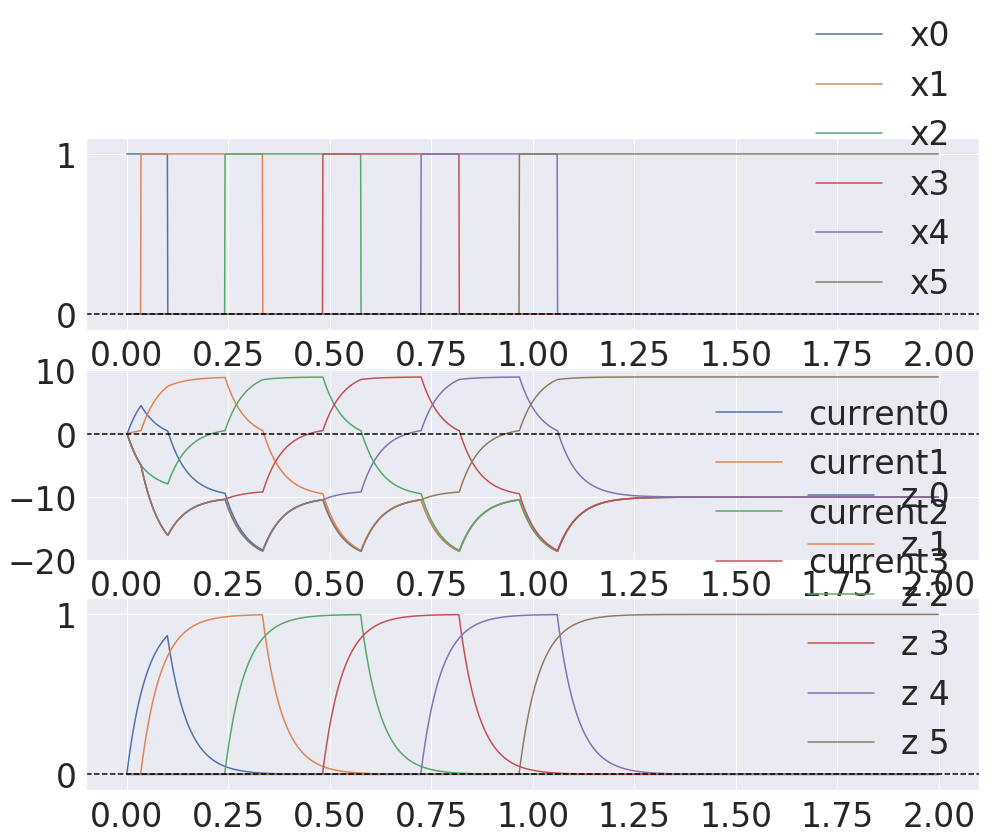

In [21]:
I_cue = 0
I_end = 5.0
T_cue = 0.100
dt = 0.001
dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, T_cue)

x_total = dic['x']
z_history = dic['z']

time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2, 3, 4, 5]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend(frameon=False);
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(0, ls='--', color='black')
ax2.legend(frameon=False);

ax3.axhline(0, ls='--', color='black')
ax3.legend(frameon=False);

plt.imshow(x_history, aspect='auto')

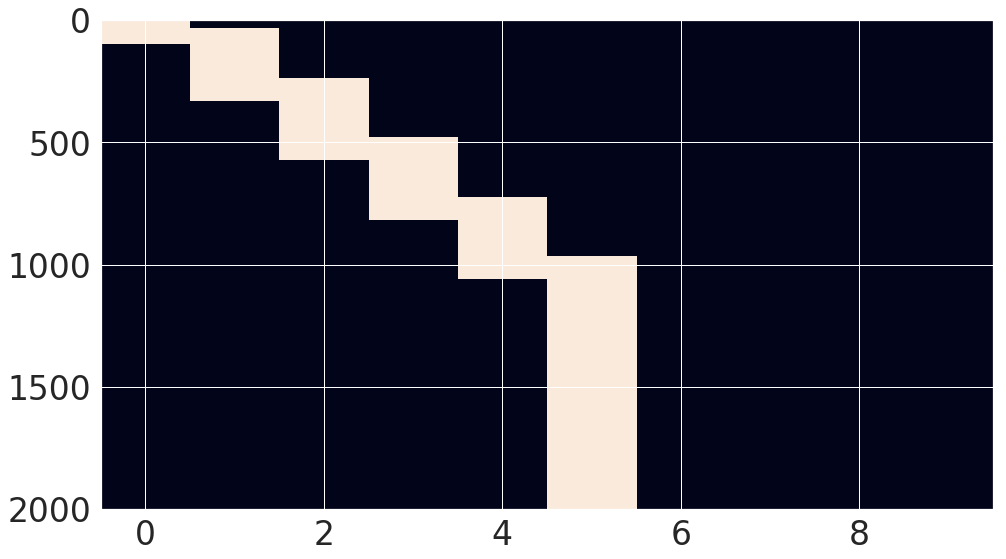

In [22]:
plt.imshow(x_history, aspect='auto')

## Training two sequences

exc_t 1.019637420943662 exc_s 8.979055655832987 inh -9.999255132932477


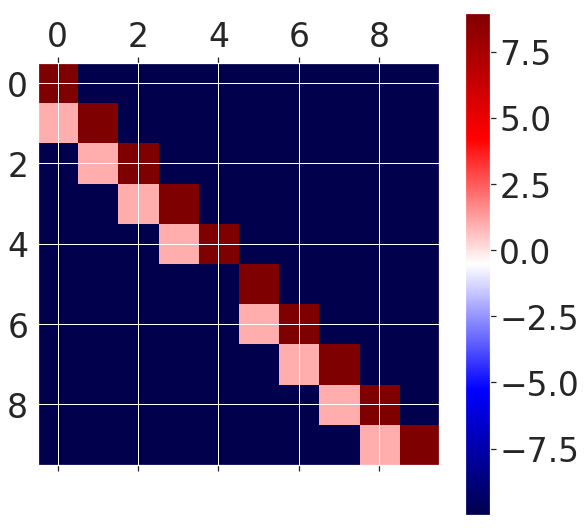

In [24]:
N = 10
sequences = [[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]
training_time = 0.500
inter_sequence_time = 1.0

max_w = 20.0
min_w = -10.0


threshold = 0.5
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100
epochs = 4

G = 100.0
tau_m = 0.010
T = 2.0
dt = 0.001

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=epochs, max_w=max_w, min_w=min_w)

w = dic['w']

   



exc_t = w[2, 1]
exc_s = w[1, 1]
inh = w[1, 2]
print('exc_t', exc_t, 'exc_s', exc_s, 'inh', inh)
plt.matshow(w, cmap='seismic')
plt.colorbar();


#### Recall 

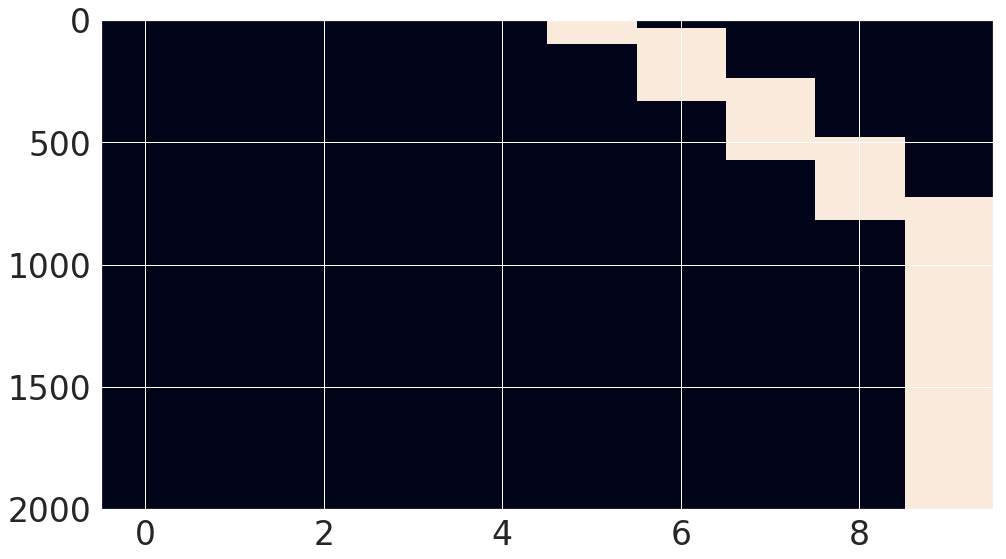

In [30]:
I_cue = 5
I_end = 5.0
T_cue = 0.100

dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, T_cue)

x_history = dic['x']
z_history = dic['z']
plt.imshow(x_history, aspect='auto');

## Disambiguation

### Pre-rule

exc_t 8.43561181887701 exc_s 1.5631528166593525 inh -9.999997481753628


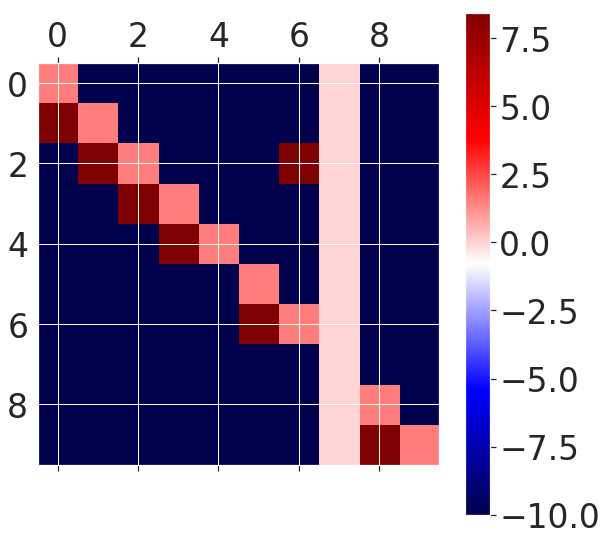

In [79]:
N = 10
sequences = [[0, 1, 2, 3, 4], [5, 6, 2, 8, 9]]
#sequences = [[5, 6, 2, 8, 9], [0, 1, 2, 3, 4]]
#sequences = [[0, 1, 2, 3, 4], [5, 6, 2, 8, 9], [5, 6, 2, 8, 9], [5, 6, 2, 8, 9], [0, 1, 2, 3, 4]]

training_time = 1.0
inter_sequence_time = 1.0

max_w = 20.0
min_w = -10.0


threshold = 0.5
tau_z = 0.100
tau_z_post = 0.005
tau_w = 0.100
epochs = 4

G = 100.0
tau_m = 0.010
T = 1.0
dt = 0.001

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=epochs, max_w=max_w, min_w=min_w, pre_rule=True)

w = dic['w']

   


index_from = 5
index_to = 6
exc_t = w[index_to, index_from]
exc_s = w[index_from, index_from]
inh = w[index_from, index_to]
print('exc_t', exc_t, 'exc_s', exc_s, 'inh', inh)
plt.matshow(w, cmap='seismic')
plt.colorbar();


#### Recall

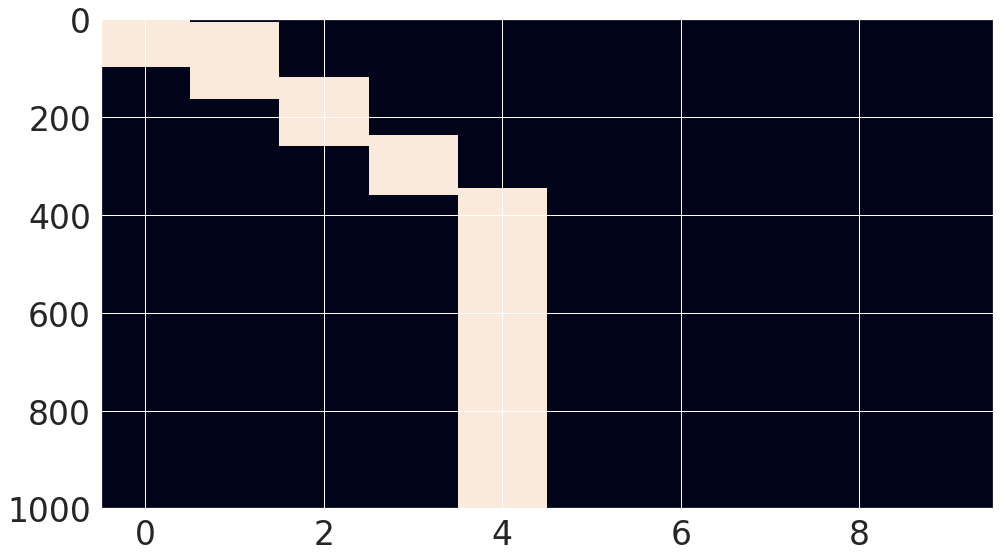

In [80]:
I_cue = 0
I_end = 5.0
T_cue = 0.100

dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, T_cue)

x_history = np.copy(dic['x']
z_history = dic['z']
plt.imshow(x_history, aspect='auto');

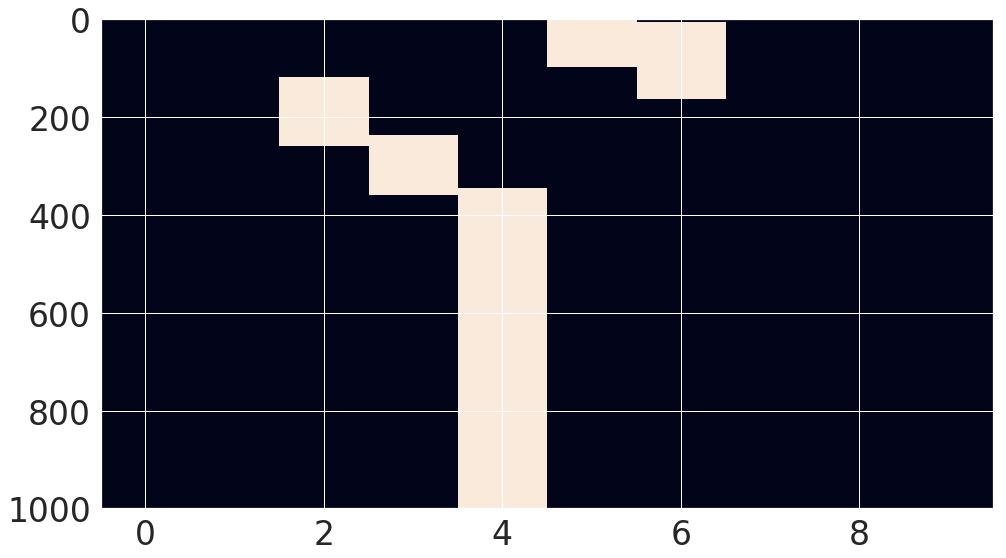

In [81]:
I_cue = 5
I_end = 5.0
T_cue = 0.100

dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, T_cue)

x_history = dic['x']
z_history = dic['z']
plt.imshow(x_history, aspect='auto');

### Post-rule

exc_t 2.7213306047354027 exc_s 4.757300229688768 inh -9.99999999933894


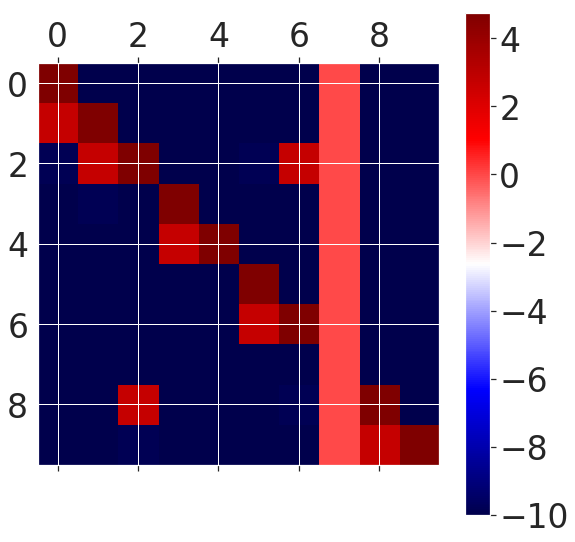

In [63]:
N = 10
sequences = [[0, 1, 2, 3, 4], [5, 6, 2, 8, 9]]
training_time = 0.500
inter_sequence_time = 1.0

max_w = 5.0
min_w = -10.0


threshold = 0.5
tau_z = 0.100
tau_z_post = 0.005
tau_w = 0.050
epochs = 4

G = 100.0
tau_m = 0.010
T = 2.0
dt = 0.001

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=epochs, max_w=max_w, min_w=min_w, pre_rule=False)

w = dic['w']

   



exc_t = w[2, 1]
exc_s = w[1, 1]
inh = w[1, 2]
print('exc_t', exc_t, 'exc_s', exc_s, 'inh', inh)
plt.matshow(w, cmap='seismic')
plt.colorbar();


In [64]:
index_from = 5
index_to = 6
exc_t = w[index_to, index_from]
exc_s = w[index_from, index_from]
inh = w[index_from, index_to]
print('exc_t', exc_t, 'exc_s', exc_s, 'inh', inh)

exc_t 2.7213306047354004 exc_s 4.757300229688768 inh -9.999983896276948


#### Recall

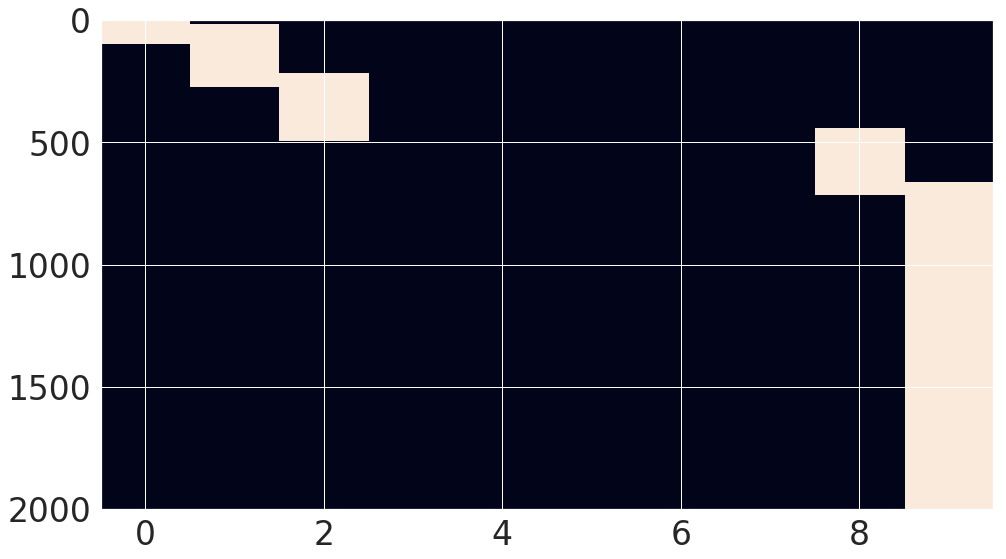

In [69]:
I_cue = 0
I_end = 5.0
T_cue = 0.100

dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, T_cue)

x_history = dic['x']
z_history = dic['z']
plt.imshow(x_history, aspect='auto');

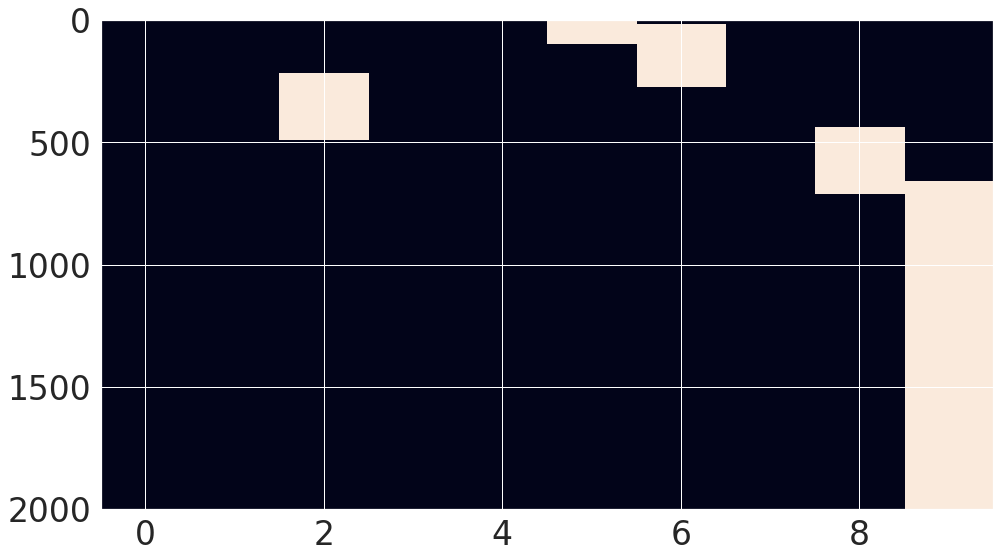

In [68]:
I_cue = 5
I_end = 5.0
T_cue = 0.100

dic = run_network_recall_limit(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, T_cue)

x_history = dic['x']
z_history = dic['z']
plt.imshow(x_history, aspect='auto');